In [3]:
#%%
import pandas as pd
import csv as csv
from sklearn.ensemble import RandomForestClassifier

# Load training data
train_df = pd.read_csv("./input/application_train.csv", header=0)

# 欠損テーブルの情報を確認する
def kesson_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return kesson_table_ren_columns
 
kesson_table(train_df) 


#%%
# TARGET との相関関係の低い(絶対値が0.001未満)のcolumnを削除
train_df = train_df.drop(["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis=1)
# 欠損率40%以上のcolumnを削除
train_df = train_df.drop(["OWN_CAR_AGE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"], axis=1)
train_df = train_df.drop(["LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE"], axis=1)
#train_df = train_df.drop(["EXT_SOURCE_1", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG"], axis=1)
#kesson_table(train_df) 

# AMT_ANNUITY クレジットカードローン
#%%
#pd.value_counts(train_df['AMT_ANNUITY']) 
train_df.fillna({'AMT_ANNUITY': train_df['AMT_ANNUITY'].mean()}, inplace = True)
#kesson_table(train_df) 

# AMT_GOODS_PRICE  ローン利率？
#%%
#train_df['AMT_GOODS_PRICE'].value_counts()
train_df.fillna({'AMT_GOODS_PRICE': train_df['AMT_GOODS_PRICE'].mean()}, inplace = True)
#kesson_table(train_df) 

# NAME_TYPE_SUIT  顧客がローンを組む時に誰が付き添っていたか
#%%
# null値レコードは削除
#train_df['NAME_TYPE_SUITE'].value_counts()
train_df.dropna(subset=['NAME_TYPE_SUITE'], inplace = True)
#kesson_table(train_df) 

# OCCUPATION_TYPE  クライアントの職業
#%%
# null値レコードは削除
#train_df['OCCUPATION_TYPE'].value_counts()
train_df.dropna(subset=['OCCUPATION_TYPE'], inplace = True)
#kesson_table(train_df) 

# EXT_SOURCE_2  クライアントの職業
#%%
# null値レコードは平均値を入れる
train_df.fillna({'EXT_SOURCE_2': train_df['EXT_SOURCE_2'].mean()}, inplace = True)


# EXT_SOURCE_3  クライアントの職業
#%%
# null値レコードは平均値を入れる
train_df.fillna({'EXT_SOURCE_3': train_df['EXT_SOURCE_3'].mean()}, inplace = True)


# OBS_30_CNT_SOCIAL_CIRCLE
#%%
# null値レコードは平均値を入れる
#train_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()
train_df.fillna({'OBS_30_CNT_SOCIAL_CIRCLE': train_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()}, inplace = True)

# DEF_30_CNT_SOCIAL_CIRCLE
#%%
# null値レコードは平均値を入れる
#train_df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()
train_df.fillna({'DEF_30_CNT_SOCIAL_CIRCLE': train_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()}, inplace = True)

# OBS_60_CNT_SOCIAL_CIRCLE
#%%
# null値レコードは平均値を入れる
#train_df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
train_df.fillna({'OBS_60_CNT_SOCIAL_CIRCLE': train_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean()}, inplace = True)

# DEF_60_CNT_SOCIAL_CIRCLE
#%%
# null値レコードは平均値を入れる
#train_df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()
train_df.fillna({'DEF_60_CNT_SOCIAL_CIRCLE': train_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()}, inplace = True)

# DAYS_LAST_PHONE_CHANGE
#%%
# null値レコードは平均値を入れる
#train_df['DAYS_LAST_PHONE_CHANGE'].value_counts()
train_df.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], inplace = True)

# AMT_REQ_CREDIT_BUREAU_HOUR
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR': train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()}, inplace = True)

# AMT_REQ_CREDIT_BUREAU_DAY
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_DAY': train_df['AMT_REQ_CREDIT_BUREAU_DAY'].mean()}, inplace = True)

# AMT_REQ_CREDIT_BUREAU_WEEK
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_WEEK': train_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()}, inplace = True)

# AMT_REQ_CREDIT_BUREAU_MON
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_MON': train_df['AMT_REQ_CREDIT_BUREAU_MON'].mean()}, inplace = True)

# AMT_REQ_CREDIT_BUREAU_QRT
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_QRT': train_df['AMT_REQ_CREDIT_BUREAU_QRT'].mean()}, inplace = True)

# AMT_REQ_CREDIT_BUREAU_YEAR
#%%
# null値レコードは平均値を入れる
train_df.fillna({'AMT_REQ_CREDIT_BUREAU_YEAR': train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()}, inplace = True)
kesson_table(train_df) 

,欠損数,%
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0
AMT_ANNUITY,0,0.0


In [15]:
#%%
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_df['NAME_CONTRACT_TYPE'] = le.fit_transform(train_df['NAME_CONTRACT_TYPE'])
train_df['NAME_CONTRACT_TYPE'].value_counts()
train_df['CODE_GENDER'] = le.fit_transform(train_df['CODE_GENDER'])
train_df['CODE_GENDER'].value_counts()
train_df['FLAG_OWN_CAR'] = le.fit_transform(train_df['FLAG_OWN_CAR'])
train_df['FLAG_OWN_CAR'].value_counts()

0    130333
1     79880
Name: FLAG_OWN_CAR, dtype: int64

In [16]:
#%%
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_df['NAME_CONTRACT_TYPE'] = le.fit_transform(train_df['NAME_CONTRACT_TYPE'])
train_df['NAME_CONTRACT_TYPE'].value_counts()
train_df['CODE_GENDER'] = le.fit_transform(train_df['CODE_GENDER'])
train_df['CODE_GENDER'].value_counts()
train_df['FLAG_OWN_CAR'] = le.fit_transform(train_df['FLAG_OWN_CAR'])
train_df['FLAG_OWN_CAR'].value_counts()
train_df['FLAG_OWN_REALTY'] = le.fit_transform(train_df['FLAG_OWN_REALTY'])
train_df['FLAG_OWN_REALTY'].value_counts()
train_df['NAME_TYPE_SUITE'] = le.fit_transform(train_df['NAME_TYPE_SUITE'])
train_df['NAME_TYPE_SUITE'].value_counts()
train_df['NAME_INCOME_TYPE'] = le.fit_transform(train_df['NAME_INCOME_TYPE'])
train_df['NAME_INCOME_TYPE'].value_counts()
train_df['NAME_EDUCATION_TYPE'] = le.fit_transform(train_df['NAME_EDUCATION_TYPE'])
train_df['NAME_EDUCATION_TYPE'].value_counts()
train_df['NAME_FAMILY_STATUS'] = le.fit_transform(train_df['NAME_FAMILY_STATUS'])
train_df['NAME_FAMILY_STATUS'].value_counts()
train_df['NAME_HOUSING_TYPE'] = le.fit_transform(train_df['NAME_HOUSING_TYPE'])
train_df['NAME_HOUSING_TYPE'].value_counts()
train_df['OCCUPATION_TYPE'] = le.fit_transform(train_df['OCCUPATION_TYPE'])
train_df['OCCUPATION_TYPE'].value_counts()
train_df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(train_df['WEEKDAY_APPR_PROCESS_START'])
train_df['WEEKDAY_APPR_PROCESS_START'].value_counts()
train_df['ORGANIZATION_TYPE'] = le.fit_transform(train_df['ORGANIZATION_TYPE'])
train_df['ORGANIZATION_TYPE'].value_counts()
kesson_table(train_df) 

,欠損数,%
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0
AMT_ANNUITY,0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002028,0.001738,-0.001415,0.003075,-0.001762,-0.000473,-0.003351,-0.001316,-0.002522,...,0.001944,0.000848,0.001155,0.003785,0.001128,0.004434,0.000948,-0.000475,0.000309,0.003200
TARGET,-0.002028,1.000000,-0.036234,0.047987,-0.033699,-0.003559,0.008120,-0.005284,-0.040702,-0.019422,...,-0.171612,-0.158583,0.010777,0.035053,0.010668,0.033077,0.061753,-0.014088,-0.001903,0.022201
NAME_CONTRACT_TYPE,0.001738,-0.036234,1.000000,-0.020851,-0.003932,0.074029,0.019063,-0.008211,-0.240386,-0.268304,...,0.013821,0.003033,-0.016848,-0.008391,-0.017033,-0.007090,0.071981,-0.016437,-0.020554,-0.059569
CODE_GENDER,-0.001415,0.047987,-0.020851,1.000000,0.333795,-0.037407,-0.000004,0.062408,0.005972,0.064102,...,-0.016306,-0.004914,-0.009574,-0.015915,-0.009373,-0.012546,0.030451,0.005198,-0.002339,-0.000871
FLAG_OWN_CAR,0.003075,-0.033699,-0.003932,0.333795,1.000000,0.010871,0.066725,0.068313,0.102033,0.126109,...,0.054454,0.004588,0.004683,-0.012272,0.004591,-0.012570,-0.036126,0.015708,-0.005522,-0.023938
FLAG_OWN_REALTY,-0.001762,-0.003559,0.074029,-0.037407,0.010871,1.000000,0.015129,0.006713,-0.037880,0.000511,...,0.007167,0.030145,0.019098,0.007386,0.019071,0.006715,0.024233,-0.000736,0.012676,0.056305
CNT_CHILDREN,-0.000473,0.008120,0.019063,-0.000004,0.066725,0.015129,1.000000,-0.003603,-0.018410,-0.006611,...,-0.024559,-0.012553,0.020949,0.003006,0.020539,0.001777,0.000038,-0.020152,-0.003206,-0.030231
AMT_INCOME_TOTAL,-0.003351,-0.005284,-0.008211,0.062408,0.068313,0.006713,-0.003603,1.000000,0.133516,0.162568,...,0.052448,-0.020263,-0.012442,-0.012237,-0.012363,-0.011861,-0.013900,0.019349,0.003790,0.008538
AMT_CREDIT,-0.001316,-0.040702,-0.240386,0.005972,0.102033,-0.037880,-0.018410,0.133516,1.000000,0.760706,...,0.139740,0.057864,-0.002620,-0.024161,-0.002573,-0.025558,-0.078535,0.048909,0.015975,-0.047374
AMT_ANNUITY,-0.002522,-0.019422,-0.268304,0.064102,0.126109,0.000511,-0.006611,0.162568,0.760706,1.000000,...,0.125863,0.043468,-0.013889,-0.023514,-0.013670,-0.024024,-0.066145,0.033299,0.012213,-0.006077


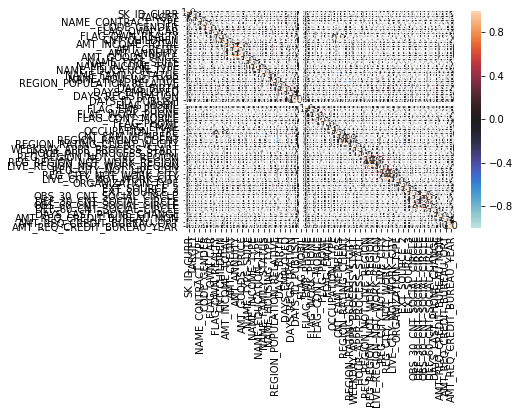

In [17]:
#%%
df_corr = train_df.corr()
display(df_corr)

#%%
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values
           )
plt.show()

In [12]:
#%%
# TARGET との相関関係の低い(絶対値が0.001未満)のcolumnを削除
train_df = train_df.drop(["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK"], axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002028,0.001738,-0.001415,0.003075,-0.001762,-0.000473,-0.003351,-0.001316,-0.002522,...,0.001944,0.000848,0.001155,0.003785,0.001128,0.004434,0.000948,-0.000475,0.000309,0.003200
TARGET,-0.002028,1.000000,-0.036234,0.047987,-0.033699,-0.003559,0.008120,-0.005284,-0.040702,-0.019422,...,-0.171612,-0.158583,0.010777,0.035053,0.010668,0.033077,0.061753,-0.014088,-0.001903,0.022201
NAME_CONTRACT_TYPE,0.001738,-0.036234,1.000000,-0.020851,-0.003932,0.074029,0.019063,-0.008211,-0.240386,-0.268304,...,0.013821,0.003033,-0.016848,-0.008391,-0.017033,-0.007090,0.071981,-0.016437,-0.020554,-0.059569
CODE_GENDER,-0.001415,0.047987,-0.020851,1.000000,0.333795,-0.037407,-0.000004,0.062408,0.005972,0.064102,...,-0.016306,-0.004914,-0.009574,-0.015915,-0.009373,-0.012546,0.030451,0.005198,-0.002339,-0.000871
FLAG_OWN_CAR,0.003075,-0.033699,-0.003932,0.333795,1.000000,0.010871,0.066725,0.068313,0.102033,0.126109,...,0.054454,0.004588,0.004683,-0.012272,0.004591,-0.012570,-0.036126,0.015708,-0.005522,-0.023938
FLAG_OWN_REALTY,-0.001762,-0.003559,0.074029,-0.037407,0.010871,1.000000,0.015129,0.006713,-0.037880,0.000511,...,0.007167,0.030145,0.019098,0.007386,0.019071,0.006715,0.024233,-0.000736,0.012676,0.056305
CNT_CHILDREN,-0.000473,0.008120,0.019063,-0.000004,0.066725,0.015129,1.000000,-0.003603,-0.018410,-0.006611,...,-0.024559,-0.012553,0.020949,0.003006,0.020539,0.001777,0.000038,-0.020152,-0.003206,-0.030231
AMT_INCOME_TOTAL,-0.003351,-0.005284,-0.008211,0.062408,0.068313,0.006713,-0.003603,1.000000,0.133516,0.162568,...,0.052448,-0.020263,-0.012442,-0.012237,-0.012363,-0.011861,-0.013900,0.019349,0.003790,0.008538
AMT_CREDIT,-0.001316,-0.040702,-0.240386,0.005972,0.102033,-0.037880,-0.018410,0.133516,1.000000,0.760706,...,0.139740,0.057864,-0.002620,-0.024161,-0.002573,-0.025558,-0.078535,0.048909,0.015975,-0.047374
AMT_ANNUITY,-0.002522,-0.019422,-0.268304,0.064102,0.126109,0.000511,-0.006611,0.162568,0.760706,1.000000,...,0.125863,0.043468,-0.013889,-0.023514,-0.013670,-0.024024,-0.066145,0.033299,0.012213,-0.006077


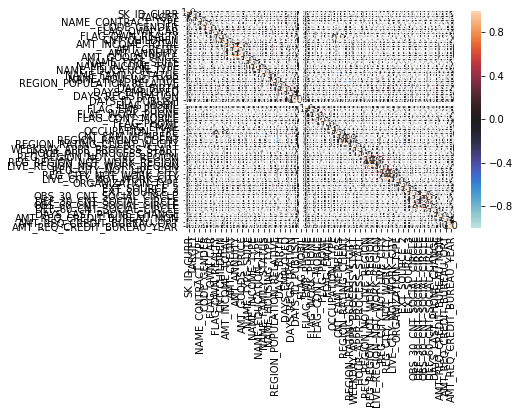

In [13]:
#%%
df_corr = train_df.corr()
display(df_corr)

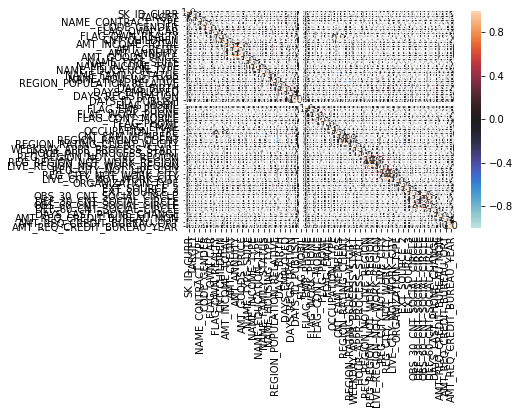

In [14]:
#%%
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values
           )
plt.show()